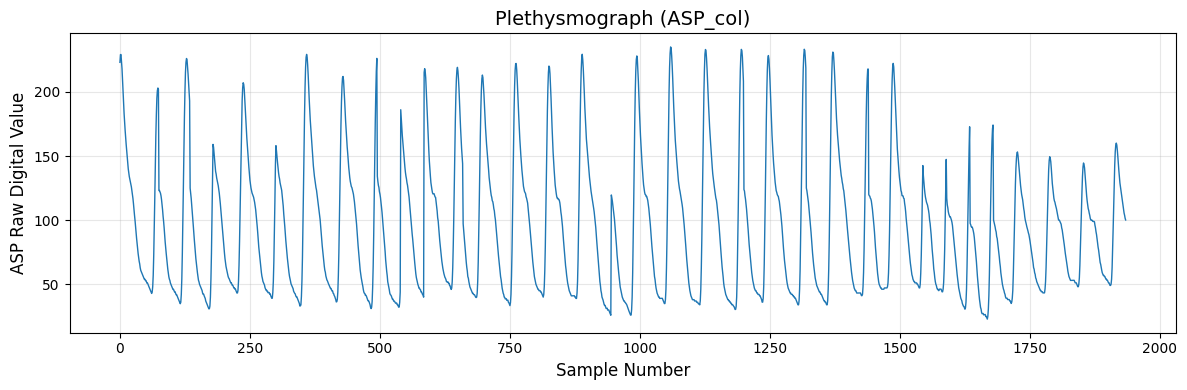

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

csv_path = 'myfile_new.csv'
df = pd.read_csv(csv_path)

if 'ASP_col' not in df.columns :
    raise KeyError("Column ASP_col not found in the csv sheet")

plot.figure(figsize=(12, 4))
plot.plot(df['ASP_col'], linewidth=1)
plot.xlabel('Sample Number', fontsize=12)
plot.ylabel('ASP Raw Digital Value', fontsize=12)
plot.title('Plethysmograph (ASP_col)', fontsize=14)
plot.grid(alpha=0.3)
plot.tight_layout()
plot.show()

Max value in dataset: 229.46 (pleth[18])
Min value in dataset: 24.46 (pleth[28])


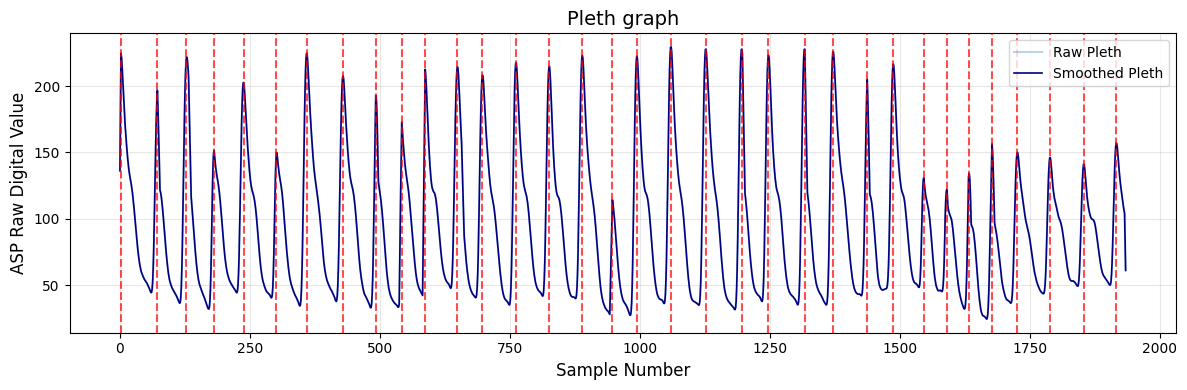

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from scipy.signal import find_peaks
import json

csv_path = 'myfile_new.csv' 
df = pd.read_csv(csv_path)

if 'ASP_col' not in df.columns:
    raise KeyError("Column 'ASP_col missing")

pleth_raw1 = df['ASP_col'].values  

#(Optional) Simple MA Smoothing
window_size = 5 
kernel = np.ones(window_size) / window_size
pleth_raw = np.convolve(pleth_raw1, kernel, mode='same')


#Min distance
fs = 100 
HR_max = 200     
min_distance = int(fs * (60 / HR_max))
#Height
peak_height = np.percentile(pleth_raw, 50)
#Prominence
dynamic_range = pleth_raw.max() - pleth_raw.min()
peak_prominence = 0.10 * dynamic_range

#Peaks
peaks, properties = find_peaks(
    pleth_raw,
    height=peak_height,
    distance=min_distance,
    prominence=peak_prominence
)

#Wave segmentation
pleth = []
segments = list(zip(peaks, peaks[1:]))
for start, end in segments:
    pleth.append(pleth_raw[start:end])

#maxima & minima
max_val = pleth_raw.max()
min_val = pleth_raw.min()
idx_max = int(np.argmax(pleth_raw))
idx_min = int(np.argmin(pleth_raw))

def find_wave(idx):
    for i, (s, e) in enumerate(segments):
        if s <= idx < e:
            return i
    return None

i_max = find_wave(idx_max)
i_min = find_wave(idx_min)

print(f"Max value in dataset: {max_val:.2f} (pleth[{i_max}])")
print(f"Min value in dataset: {min_val:.2f} (pleth[{i_min}])")

#Wave segementation - List's
pleth = []
for i in range(len(peaks) - 1):
    start, end = peaks[i], peaks[i + 1]
    pleth.append(pleth_raw[start:end])

# Plots
pt.figure(figsize=(12, 4))
pt.plot(pleth_raw, label='Raw Pleth', alpha=0.3)
pt.plot(pleth_raw, label='Smoothed Pleth', color='navy', linewidth=1.2)

for peak_idx in peaks:
    pt.axvline(x=peak_idx, color='red', linestyle='--', alpha=0.7)

pt.xlabel('Sample Number', fontsize=12)
pt.ylabel('ASP Raw Digital Value', fontsize=12)
pt.title('Pleth graph', fontsize=14)
pt.legend(loc='upper right')
pt.grid(alpha=0.3)
pt.tight_layout()
pt.show()


# Json sabing
waves = []
for i in range(len(peaks)-1):
    start, end = peaks[i], peaks[i+1]
    waves.append([round(val, 2) for val in pleth_raw[start:end]])
with open('pleth_waves.json', 'w') as f:
    json.dump(waves, f, indent=2)


In [13]:
pleth[17]

array([222.44 , 220.76 , 214.92 , 206.36 , 196.3  , 186.06 , 176.12 ,
       167.   , 158.82 , 151.46 , 144.74 , 138.58 , 133.38 , 128.86 ,
       125.24 , 122.7  , 120.9  , 119.74 , 118.83 , 117.91 , 116.43 ,
       114.61 , 111.93 , 108.66 , 104.82 , 100.44 ,  95.48 ,  90.36 ,
        85.16 ,  79.76 ,  74.58 ,  69.8  ,  65.108,  60.928,  57.094,
        53.61 ,  50.504,  47.922,  45.582,  43.794,  42.398,  41.406,
        40.588,  39.978,  39.572,  39.366,  39.16 ,  39.17 ,  38.962,
        38.554,  37.95 ,  37.136,  36.322,  36.324,  38.134,  43.444,
        53.482,  69.198,  90.454, 116.24 , 143.8  , 170.6  , 193.86 ,
       211.98 , 223.76 , 229.28 ])

# Using Ploty.js for plotting

In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from scipy.signal import find_peaks
import json

csv_path = 'myfile_new.csv' 
df = pd.read_csv(csv_path)

if 'ASP_col' not in df.columns:
    raise KeyError("Column 'ASP_col missing")

pleth_raw1 = df['ASP_col'].values  

#(Optional) Simple MA Smoothing
window_size = 5 
kernel = np.ones(window_size) / window_size
pleth_raw = np.convolve(pleth_raw1, kernel, mode='same')


#Min distance
fs = 100 
HR_max = 200     
min_distance = int(fs * (60 / HR_max))
#Height
peak_height = np.percentile(pleth_raw, 50)
#Prominence
dynamic_range = pleth_raw.max() - pleth_raw.min()
peak_prominence = 0.10 * dynamic_range

#Peaks
peaks, properties = find_peaks(
    pleth_raw,
    height=peak_height,
    distance=min_distance,
    prominence=peak_prominence
)

#Wave segmentation
pleth = []
segments = list(zip(peaks, peaks[1:]))
for start, end in segments:
    pleth.append(pleth_raw[start:end])

#maxima & minima
max_val = pleth_raw.max()
min_val = pleth_raw.min()
idx_max = int(np.argmax(pleth_raw))
idx_min = int(np.argmin(pleth_raw))

def find_wave(idx):
    for i, (s, e) in enumerate(segments):
        if s <= idx < e:
            return i
    return None

i_max = find_wave(idx_max)
i_min = find_wave(idx_min)

print(f"Max value in dataset: {max_val:.2f} (pleth[{i_max}])")
print(f"Min value in dataset: {min_val:.2f} (pleth[{i_min}])")

#Wave segementation - List's
pleth = []
for i in range(len(peaks) - 1):
    start, end = peaks[i], peaks[i + 1]
    pleth.append(pleth_raw[start:end])



#Plotting
time_axis = np.arange(len(pleth_raw))
fig = go.Figure()
# Smoothed pleth trace
fig.add_trace(go.Scatter(
    x=time_axis,
    y=pleth_raw,
    mode='lines',
    name='Smoothed Pleth'
))
# Vertical lines
for pk in peaks:
    fig.add_shape(
        type='line',
        x0=pk, x1=pk,
        y0=min_val, y1=max_val,
        line=dict(color='red', dash='dash')
    )
fig.update_layout(
    title='Pleth Graph with Wave Boundaries',
    xaxis_title='Sample Number',
    yaxis_title='ASP Raw Digital Value',
    height=400,
    width=1400,
    showlegend=True
)
fig.show()

Max value in dataset: 229.46 (pleth[18])
Min value in dataset: 24.46 (pleth[28])


# Scatter Plot with Ploty

In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from scipy.signal import find_peaks
import json

csv_path = 'myfile_new.csv' 
df = pd.read_csv(csv_path)

if 'ASP_col' not in df.columns:
    raise KeyError("Column 'ASP_col missing")

pleth_raw1 = df['ASP_col'].values  

#(Optional) Simple MA Smoothing
window_size = 5 
kernel = np.ones(window_size) / window_size
pleth_raw = np.convolve(pleth_raw1, kernel, mode='same')


#Min distance
fs = 100 
HR_max = 200     
min_distance = int(fs * (60 / HR_max))
#Height
peak_height = np.percentile(pleth_raw, 50)
#Prominence
dynamic_range = pleth_raw.max() - pleth_raw.min()
peak_prominence = 0.10 * dynamic_range

#Peaks
peaks, properties = find_peaks(
    pleth_raw,
    height=peak_height,
    distance=min_distance,
    prominence=peak_prominence
)

#Wave segmentation
pleth = []
segments = list(zip(peaks, peaks[1:]))
for start, end in segments:
    pleth.append(pleth_raw[start:end])

#maxima & minima
max_val = pleth_raw.max()
min_val = pleth_raw.min()
idx_max = int(np.argmax(pleth_raw))
idx_min = int(np.argmin(pleth_raw))

def find_wave(idx):
    for i, (s, e) in enumerate(segments):
        if s <= idx < e:
            return i
    return None

i_max = find_wave(idx_max)
i_min = find_wave(idx_min)

print(f"Max value in dataset: {max_val:.2f} (pleth[{i_max}])")
print(f"Min value in dataset: {min_val:.2f} (pleth[{i_min}])")

#Wave segementation - List's
pleth = []
for i in range(len(peaks) - 1):
    start, end = peaks[i], peaks[i + 1]
    pleth.append(pleth_raw[start:end])



#Plotting
time_axis = np.arange(len(pleth_raw))
fig = go.Figure()
# Scatter
fig.add_trace(go.Scatter(
    x=time_axis,
    y=pleth_raw,
    mode='markers',
    marker=dict(size=4),
    name='Pleth Scatter'
))
# Vertical lines 
for pk in peaks:
    fig.add_shape(
        type='line',
        x0=pk, x1=pk,
        y0=min_val, y1=max_val,
        line=dict(color='red', dash='dash')
    )
fig.update_layout(
    title='Pleth Scatter Plot with Wave Boundaries',
    xaxis_title='Sample Number',
    yaxis_title='ASP Raw Digital Value',
    height=400,
    width=1400,
    showlegend=True
)

fig.show()

Max value in dataset: 229.46 (pleth[18])
Min value in dataset: 24.46 (pleth[28])
